In [1]:
from ipynb.fs.full.data_processing import (
    filter_patients,
    filter_pos,
    get_sym_severity,
    get_sym_severity_score,
    is_abnormal_cxr,
    open_data,
    plot_fill_rates,
    print_data_info,
    SYMPTOMS,
    VITALS,
)

### load and process data

In [2]:
data = open_data()
print_data_info(data)

positive_patients = filter_pos(data)
symptomatic_patients = filter_patients(data, SYMPTOMS)
patients_w_vitals = filter_patients(data, VITALS, col_type='numeric')

is_not_null = ~data['cxr_impression'].isnull()
data.loc[is_not_null, 'is_abnormal_cxr'] = data.loc[
    is_not_null, 'cxr_impression'
].apply(lambda cxr: is_abnormal_cxr(cxr))

data.loc[:, 'num_symptoms'] = data.loc[:, :].apply(
    lambda x: sum(1 for sym in SYMPTOMS if x[sym] == True), axis=1
)
data['severity_score'] = data.apply(
    lambda x: get_sym_severity_score(x), axis=1
)
data['sym_severity'] = data.severity_score.apply(
    lambda x: get_sym_severity(x)
)


INFO:root:`er_referral` only has single unique value of False in entire dataset.
INFO:root:Filtering out patients...
INFO:root:    ---- 11169 --> 5315 (47.59%)
INFO:root:Filtering out patients...
INFO:root:    ---- 11169 --> 6772 (60.63%)


### plot fill rates

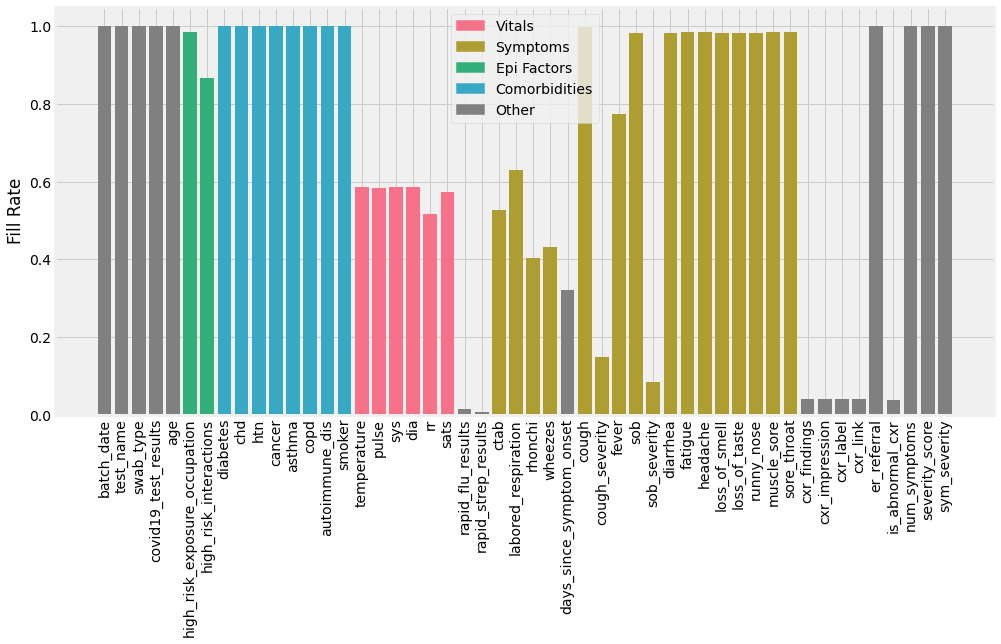

In [3]:
plot_fill_rates(data)
